In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

'1.4.2'

In [3]:
!pip install -q pyarrow
!pip install --upgrade scikit-learn

In [4]:
import sklearn
print(sklearn.__version__)

1.4.2


In [5]:
df_Jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_Feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [6]:
print(f' January shape: {df_Jan.shape}') #Q1: 19 columns
print(f' February shape: {df_Feb.shape}')

 January shape: (3066766, 19)
 February shape: (2913955, 19)


In [7]:
df_Jan['duration'] = ((df_Jan['tpep_dropoff_datetime'] - df_Jan['tpep_pickup_datetime']) / pd.Timedelta(minutes = 1)).astype(int)
df_Feb['duration'] = ((df_Feb['tpep_dropoff_datetime'] - df_Feb['tpep_pickup_datetime']) / pd.Timedelta(minutes = 1)).astype(int)

In [8]:
# count standard deviation
def compute_std(x: pd.Series):
    mean_val = np.sum(x)/x.shape[0]
    std_val = np.sqrt(np.sum(np.square(x.subtract(mean_val)))/(x.shape[0]-1))
    return std_val

print(compute_std(df_Jan['duration'])) #Q2: 42.59


42.59449915808723


In [9]:
x1 = (df_Jan['duration'] <= 60) & (df_Jan['duration'] >= 1)
x2 = (df_Feb['duration'] <= 60) & (df_Feb['duration'] >= 1)

df_Jan_no_outlier = df_Jan[x1]
df_Feb_no_outlier = df_Feb[x2]

In [10]:
df_Jan_no_outlier.shape[0] / df_Jan.shape[0] #Q3: 98%

0.9818303711466737

<AxesSubplot:>

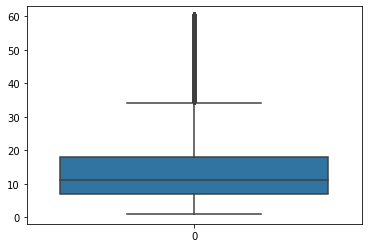

In [11]:
sns.boxplot(data=df_Jan_no_outlier['duration'])

<AxesSubplot:>

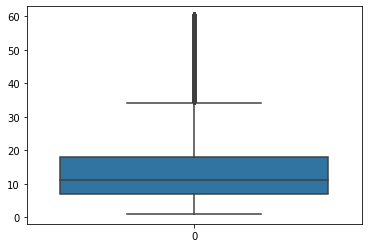

In [12]:
sns.boxplot(data=df_Feb_no_outlier['duration'])

In [13]:
#Q4: One hot encoding
pu_and_do_df_Jan = df_Jan_no_outlier[['PULocationID', 'DOLocationID']]

pu_and_do_df_Feb = df_Feb_no_outlier[['PULocationID', 'DOLocationID']]



In [14]:
# from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

# check missing data
pu_and_do_df_Jan.isnull().sum()

# convert int to string value
pu_and_do_df_Jan = pu_and_do_df_Jan.astype(str)
train_dicts = pu_and_do_df_Jan.to_dict(orient='records')

# one hot encoding
dv = DictVectorizer(sparse=True)
X_train=dv.fit_transform(train_dicts).astype(int)
y_train = df_Jan_no_outlier['duration'].values

In [15]:
# from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

# check missing data
pu_and_do_df_Feb.isnull().sum()

# convert int to string value
pu_and_do_df_Feb = pu_and_do_df_Feb.astype(str)
val_dicts = pu_and_do_df_Feb.to_dict(orient='records')

# one hot encoding

X_val=dv.transform(val_dicts).astype(int)
y_val = df_Feb_no_outlier['duration'].values

In [16]:
print(f'X train shape: {X_train.shape}') #Q4: 515 cols
print(f'y train shape: {y_train.shape}')

X train shape: (3011044, 515)
y train shape: (3011044,)


In [17]:
# Build Loggistic Regresision model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
# Computing RMSE on train
y_pred_ontrain = model.predict(X_train)

rmse = root_mean_squared_error(y_pred_ontrain, y_train)
print(f'RMSE = {rmse}') #Q5: RMSE = 7.6xx

RMSE = 7.688651659305238


In [19]:
# Computing RMSE on validation
y_pred_onval = model.predict(X_val)

rmse = root_mean_squared_error(y_pred_onval, y_val)
print(f'RMSE = {rmse}') #Q6:7.8xx

RMSE = 7.868985034138532
